In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [199]:
df = pd.read_excel('Logit model data.xlsx')

In [200]:
df_original = df.copy()
df.head()

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [201]:
display(df.shape)
display(df.columns)

(614, 13)

Index(['loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [202]:
df.dtypes

loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [204]:
#total sanctioned and not sanctioned loans 
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [205]:
#percentage of loans sanctioned and not sanctioned
df['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

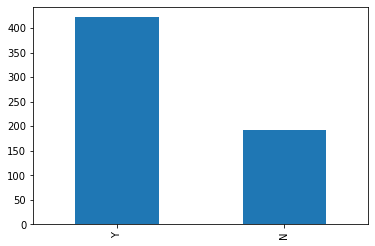

In [206]:
df['Loan_Status'].value_counts().plot.bar()

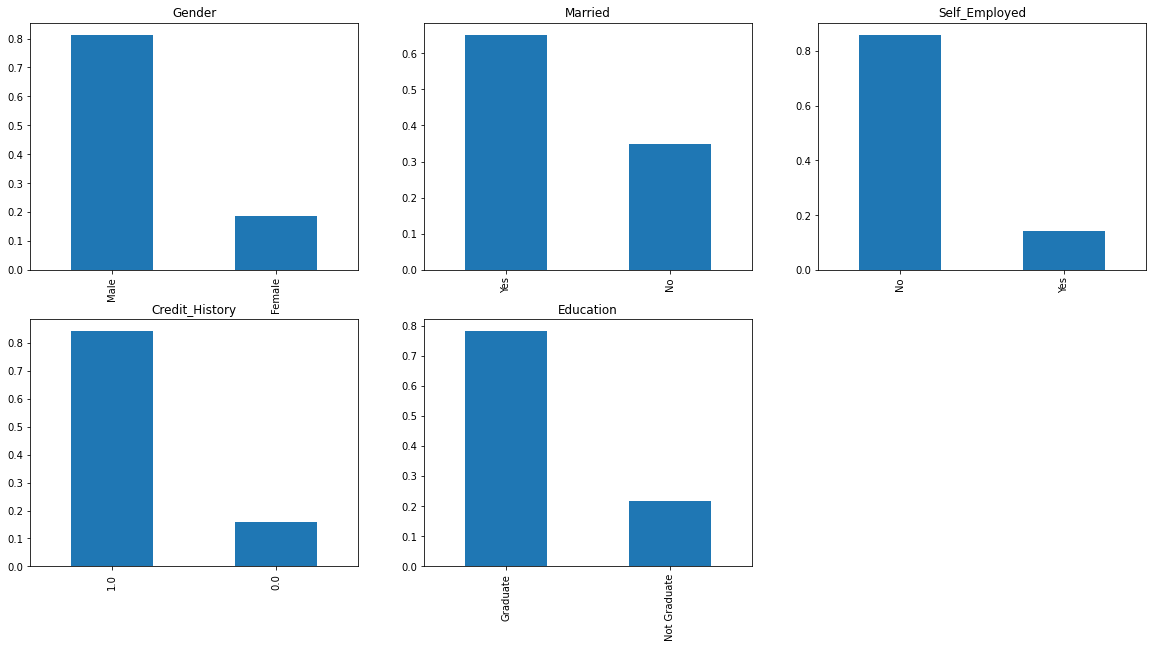

In [207]:
#distribution of loan sanction on the basis of variables with two class
plt.subplot(231)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(232)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(233)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(234)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(235)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

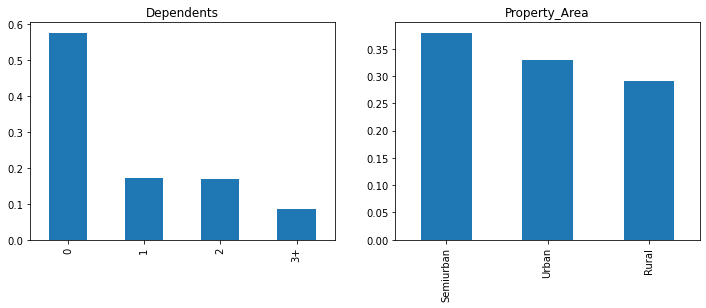

In [208]:
#distribution of laon sanction on the basis of variables with more than two classes
plt.subplot(121)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(12,4), title= 'Dependents')

plt.subplot(122)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

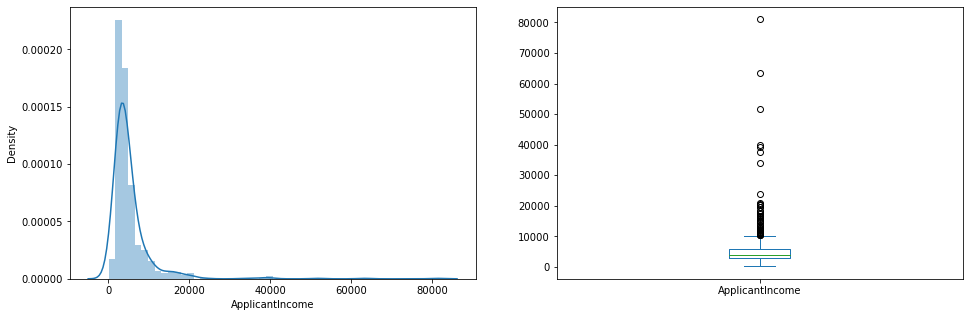

In [209]:
# Visualizing ApplicantIncome distribution
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

# Visualizing quantiles of the ApplicantIncome
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

Text(0.5, 0.98, '')

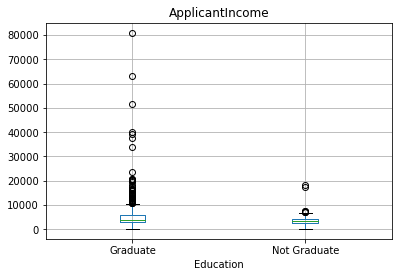

In [210]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

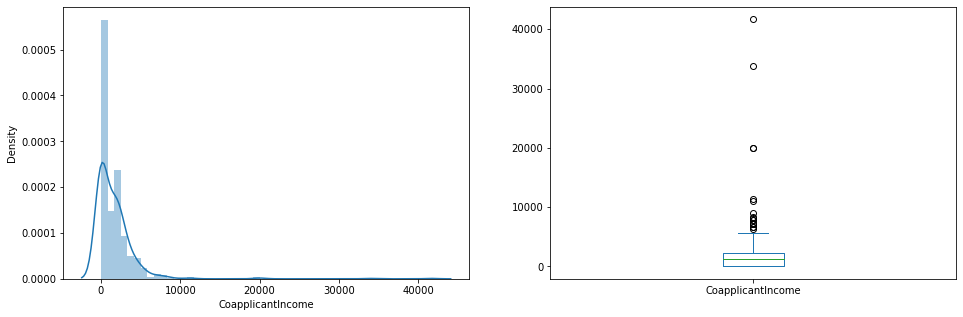

In [211]:
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

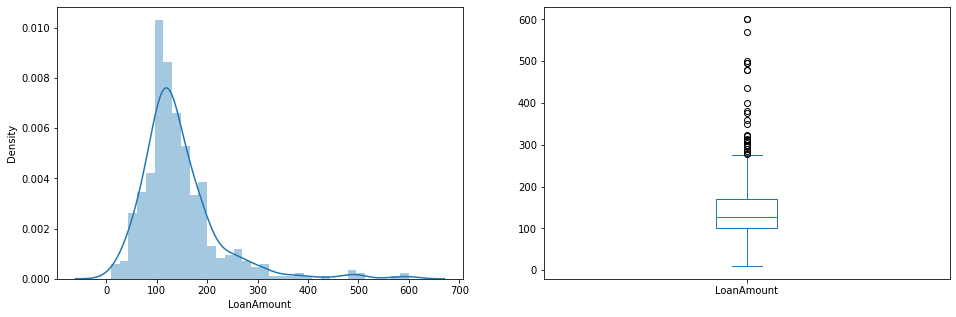

In [212]:

plt.subplot(121)
df_drop=df.dropna()
sns.distplot(df_drop['LoanAmount']);

plt.subplot(122)
df_drop['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [213]:
# frequency table of a variable will give us the count of each category in that variable
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:title={'center':'Loan_Amount_Term'}>

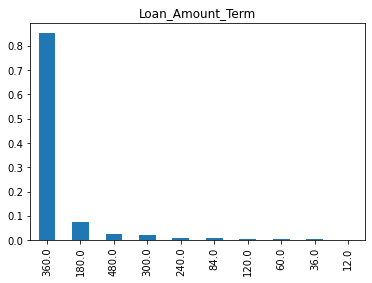

In [214]:
#percentage of tenures of the loan application
df['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term')

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


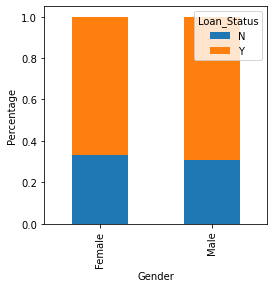

In [215]:
print(pd.crosstab(df['Gender'],df['Loan_Status']))
#percentage of male/females got loan sanctioned
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis = 0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


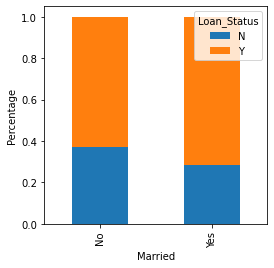

In [216]:
print(pd.crosstab(df['Married'],df['Loan_Status']))
#percentage of married/unmarried got loan sanctioned
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


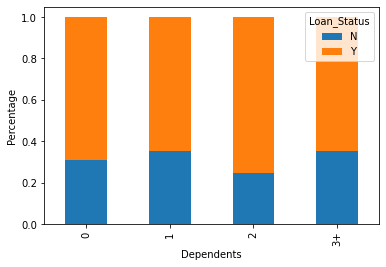

In [217]:
print(pd.crosstab(df['Dependents'],df['Loan_Status']))

Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


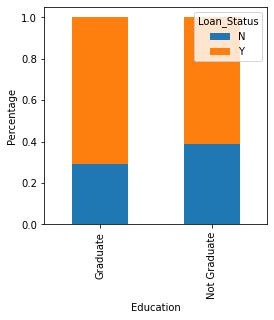

In [218]:
print(pd.crosstab(df['Education'],df['Loan_Status']))

Education=pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


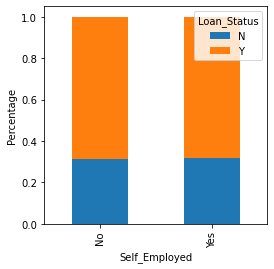

In [219]:
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


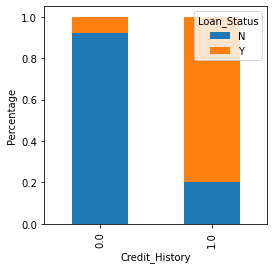

In [220]:
print(pd.crosstab(df['Credit_History'],df['Loan_Status']))

Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


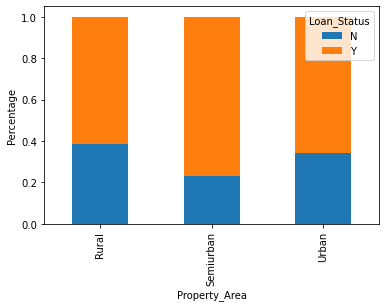

In [221]:
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')


Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64


<AxesSubplot:xlabel='Loan_Status'>

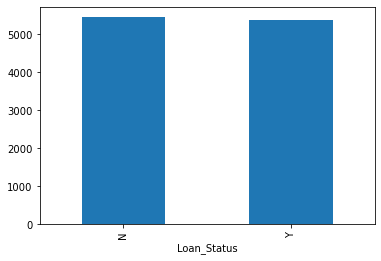

In [222]:
print(df.groupby('Loan_Status')['ApplicantIncome'].mean())

df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [223]:
#classifying applicant into classes of income
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Income_bin'] = pd.cut(df['ApplicantIncome'],bins,labels=group)

In [224]:
df.head(8)

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,High
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,Low
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,Average


Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


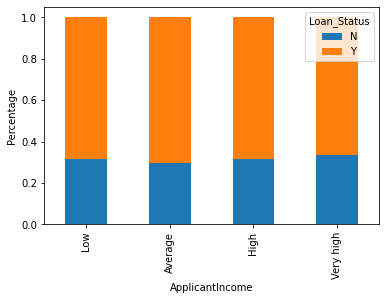

In [225]:
print(pd.crosstab(df['Income_bin'],df['Loan_Status']))

Income_bin = pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [226]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
df['Coapplicant_Income_bin'] = pd.cut(df['CoapplicantIncome'],bins,labels=group)

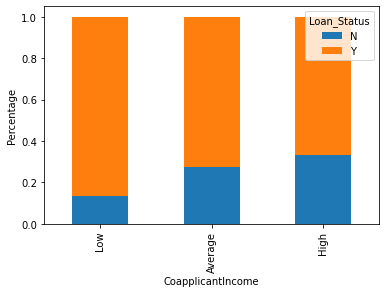

In [227]:
Coapplicant_Income_bin = pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [228]:
print(len(df[df["CoapplicantIncome"] == 0]))
"Percentage of CoapplicantIncome = 0 is:",  (len(df[df["CoapplicantIncome"] == 0])/len(df["CoapplicantIncome"])*100)

273


('Percentage of CoapplicantIncome = 0 is:', 44.462540716612374)

In [229]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [230]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High', 'Very high']
df['Total_Income_bin'] = pd.cut(df['Total_Income'],bins,labels=group)

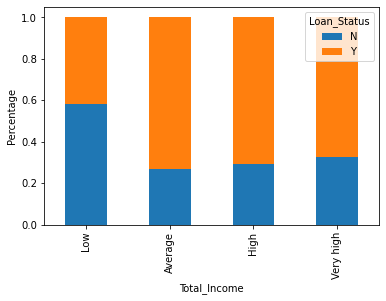

In [231]:
Total_Income_bin = pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [232]:
bins = [0,100,200,700]
group = ['Low','Average','High']
df['LoanAmount_bin'] = pd.cut(df['LoanAmount'],bins,labels=group)

In [233]:
df

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,Coapplicant_Income_bin,Total_Income,Total_Income_bin,LoanAmount_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,NaN,5849.0,High,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very high,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,Average,Low
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,High,Low
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high,Low,8312.0,Very high,High
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high,NaN,7583.0,Very high,Average


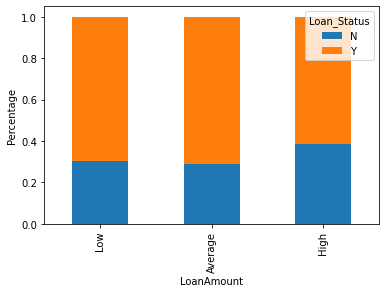

In [234]:
LoanAmount_bin = pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [235]:
df = df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [236]:
#replacing varible Dependents of 3+ to an integer 3
df['Dependents'].replace('3+', 3, inplace=True)

In [237]:
df['Loan_Status'].replace('N', 0, inplace=True)
df['Loan_Status'].replace('Y', 1, inplace=True)

In [238]:
df.head()

,loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [239]:
df.columns

Index(['loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [240]:
from sklearn.preprocessing import MinMaxScaler

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Dependents,1.000000,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.006781
ApplicantIncome,0.118679,1.000000,-0.116605,0.570909,-0.045306,-0.014715,-0.004710
CoapplicantIncome,0.027259,-0.116605,1.000000,0.188619,-0.059878,-0.002056,-0.059187
LoanAmount,0.163997,0.570909,0.188619,1.000000,0.039447,-0.008433,-0.037318
Loan_Amount_Term,-0.100484,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.021268
Credit_History,-0.050082,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.561678
Loan_Status,0.006781,-0.004710,-0.059187,-0.037318,-0.021268,0.561678,1.000000


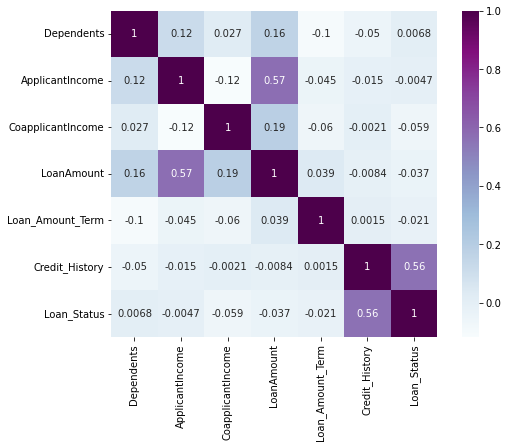

In [241]:
#to check the correlation among the variables
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

matrix

# Data wrangling
filling the missing values of the series and reducing the skewness of the data for Logistic Regression

In [242]:
df.isnull().sum()

loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [243]:
#filling NA values with mode value of the series
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [244]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [245]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [246]:
#alloted the center value to the Loan Amount
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [247]:
# check whether all the missing values are filled in the Train dataset
df.isnull().sum()

loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Text(0.5, 1.0, 'LoanAmount')

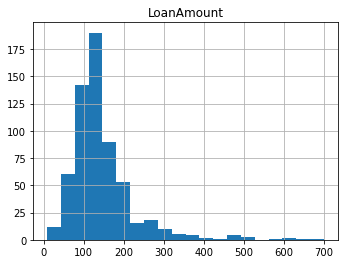

In [248]:
#observing the skewness of the LoanAmount
ax1 = plt.subplot(121)
df['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("LoanAmount")

In [249]:
#converting the series to lognormal to reduce the right skewness of the series
df['LoanAmount_log'] = np.log(df['LoanAmount'])

Text(0.5, 1.0, 'Train')

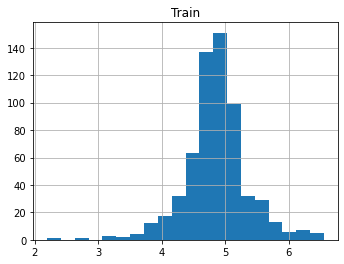

In [250]:
ax1 = plt.subplot(121)
df['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

In [251]:
df = df.drop('loan_ID', axis=1)

In [252]:
X = df.drop('Loan_Status', 1)
y = df.Loan_Status

In [253]:
X = pd.get_dummies(X)
df = pd.get_dummies(df)


In [254]:
display(X);display(y)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,1,0,1,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,4.262680,1,0,1,0,1,0,1,0,1,0,0
610,3.0,4106,0.0,40.0,180.0,1.0,3.688879,0,1,0,1,1,0,1,0,1,0,0
611,1.0,8072,240.0,253.0,360.0,1.0,5.533389,0,1,0,1,1,0,1,0,0,0,1
612,2.0,7583,0.0,187.0,360.0,1.0,5.231109,0,1,0,1,1,0,1,0,0,0,1


0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [255]:
X.shape, df.shape

((614, 18), (614, 19))

In [256]:
X = scaler.fit_transform(X)
display(X)

array([[0.        , 0.07048856, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.05482993, 0.03619171, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.03525046, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.33333333, 0.09798392, 0.00575995, ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.09193568, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.05482993, 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [268]:
X=pd.DataFrame(X)

In [269]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.070489,0.000000,0.172214,0.743590,1.0,0.609760,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.333333,0.054830,0.036192,0.172214,0.743590,1.0,0.609760,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.000000,0.035250,0.000000,0.082489,0.743590,1.0,0.457624,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.000000,0.030093,0.056592,0.160637,0.743590,1.0,0.594936,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.000000,0.072356,0.000000,0.191027,0.743590,1.0,0.631977,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.000000,0.034014,0.000000,0.089725,0.743590,1.0,0.474397,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
610,1.000000,0.048930,0.000000,0.044863,0.358974,1.0,0.342605,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
611,0.333333,0.097984,0.005760,0.353111,0.743590,1.0,0.766255,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
612,0.666667,0.091936,0.000000,0.257598,0.743590,1.0,0.696827,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


# Modelling

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [259]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((429, 18), (185, 18), (429,), (185,))

In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import make_scorer

In [286]:
scoring = {"AUC": "roc_auc", "Precission": make_scorer(precision_score)}

In [261]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [262]:
pred_y = model.predict(x_test)
precision_score(y_test, pred_y)*100

81.48148148148148

[[ 21  30]
 [  2 132]]


Text(33.0, 0.5, 'True')

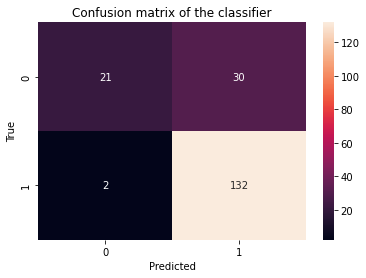

In [263]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, pred_y)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [264]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.81      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.86      0.70      0.73       185
weighted avg       0.84      0.83      0.80       185



In [265]:
from sklearn.model_selection import StratifiedKFold

In [266]:
from sklearn.model_selection import GridSearchCV

In [310]:
mean_accuracy = []
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr, yvl = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl, pred_test)
    mean_accuracy.append(score)
    print('precission_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation precission: %.2f "%((sum(mean_precission)/len(mean_precission))*100)+"%")


1 of kfold 5
precission_score 80.39%

2 of kfold 5
precission_score 80.95%

3 of kfold 5
precission_score 77.57%

4 of kfold 5
precission_score 78.85%

5 of kfold 5
precission_score 77.57%

Mean validation precission: 78.68 %


In [311]:
lr_clf = GridSearchCV(model,{"C":np.logspace(1,10,10), "penalty":["l2"]},cv=5,scoring=scoring,refit="Precission",return_train_score=True)
#l1 means lasso regression and l2 means ridge regression
lr_clf.fit(X, y)
lr_clf.cv_results_

{'mean_fit_time': array([0.03093934, 0.02701378, 0.02341242, 0.02059159, 0.02055635,
        0.01933661, 0.01996841, 0.02064805, 0.01938186, 0.01915812]),
 'std_fit_time': array([0.01035359, 0.00295049, 0.00261108, 0.00409458, 0.00298275,
        0.00099175, 0.0026104 , 0.00335316, 0.00303745, 0.00167979]),
 'mean_score_time': array([0.00617051, 0.0059557 , 0.00570664, 0.00565071, 0.00624557,
        0.00573545, 0.00540109, 0.00565438, 0.00521336, 0.00560336]),
 'std_score_time': array([1.48490512e-03, 9.01291607e-05, 3.45038544e-04, 7.64235757e-04,
        7.05636274e-04, 3.87579842e-04, 4.90798631e-04, 5.44145234e-04,
        3.89773139e-04, 5.20327963e-04]),
 'param_C': masked_array(data=[10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0,
                    10000000.0, 100000000.0, 1000000000.0, 10000000000.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_pe

In [304]:
lr_df = pd.DataFrame(lr_clf.cv_results_)
lr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,mean_test_Precission,std_test_Precission,rank_test_Precission,split0_train_Precission,split1_train_Precission,split2_train_Precission,split3_train_Precission,split4_train_Precission,mean_train_Precission,std_train_Precission
0,0.031446,0.009751,0.006486,0.000809,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.801858,0.711146,0.745421,...,0.790648,0.023611,1,0.793765,0.801932,0.800481,0.78487,0.788095,0.793829,0.006679
1,0.033419,0.008507,0.007303,0.001282,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.798762,0.693498,0.742979,...,0.790648,0.023611,1,0.793765,0.803398,0.800481,0.78487,0.789474,0.794397,0.006833
2,0.032287,0.009597,0.006619,0.001130,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.799071,0.693808,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
3,0.032345,0.016953,0.011610,0.009759,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.799381,0.692570,0.743284,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
4,0.023057,0.003770,0.007128,0.000680,100000.0,l2,"{'C': 100000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
5,0.032496,0.008209,0.006398,0.001468,1000000.0,l2,"{'C': 1000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
6,0.029809,0.003766,0.009308,0.004287,10000000.0,l2,"{'C': 10000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
7,0.023176,0.004712,0.007593,0.002667,100000000.0,l2,"{'C': 100000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
8,0.022759,0.002716,0.005876,0.000688,1000000000.0,l2,"{'C': 1000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
9,0.027181,0.013063,0.006920,0.000681,10000000000.0,l2,"{'C': 10000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371


In [305]:
lr_df[['param_C','param_penalty','mean_test_Precission']]

,param_C,param_penalty,mean_test_Precission
0,10.0,l2,0.790648
1,100.0,l2,0.790648
2,1000.0,l2,0.790207
3,10000.0,l2,0.790207
4,100000.0,l2,0.790207
5,1000000.0,l2,0.790207
6,10000000.0,l2,0.790207
7,100000000.0,l2,0.790207
8,1000000000.0,l2,0.790207
9,10000000000.0,l2,0.790207


In [325]:
display(f"Best perameter is{lr_clf.best_params_}")
display(f"Best Precission is {round(lr_clf.best_score_,4)*100}%")

"Best perameter is{'C': 10.0, 'penalty': 'l2'}"

'Best Precission is 79.06%'

In [306]:
from sklearn import tree

In [327]:
mean_precission = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl,pred_test)
    mean_precission.append(score)
    print('precission_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation precission: %.2f "%((sum(mean_precission)/len(mean_precission))*100)+"%")


1 of kfold 5
precission_score 77.78%

2 of kfold 5
precission_score 81.18%

3 of kfold 5
precission_score 77.53%

4 of kfold 5
precission_score 79.31%

5 of kfold 5
precission_score 77.63%

Mean validation precission: 78.68 %


In [328]:
dt_clf = GridSearchCV(model,{'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']},cv=5,scoring=scoring,refit="Precission",return_train_score=True)
#l1 means lasso regression and l2 means ridge regression
dt_clf.fit(X, y)
dt_clf.cv_results_

{'mean_fit_time': array([0.00565166, 0.00312572, 0.00161881, 0.        , 0.        ,
        0.00950427, 0.00181785, 0.        , 0.006251  , 0.        ,
        0.00071888, 0.0031424 , 0.00070949, 0.00486164, 0.00064421,
        0.00686088, 0.00434446, 0.00442271, 0.00161915, 0.00312381,
        0.00594325, 0.00060029, 0.00340014, 0.00340018, 0.00340281,
        0.00340037, 0.00359964, 0.00319748, 0.00400238, 0.00360041,
        0.00299959, 0.00324202, 0.00361776, 0.00299978, 0.00319834,
        0.0006    , 0.00758376, 0.00224361, 0.00081491, 0.00151815,
        0.00949078, 0.        , 0.        , 0.0107091 , 0.00312543,
        0.00121808, 0.00312519, 0.00312538, 0.        , 0.0066927 ,
        0.        , 0.        , 0.00071855, 0.01249728, 0.        ,
        0.        , 0.        , 0.00384078, 0.01251602, 0.        ,
        0.00171843, 0.00370183, 0.        , 0.00394201, 0.00625038,
        0.00121861, 0.00626655, 0.        , 0.0054431 , 0.00211811,
        0.        , 0.        ,

In [329]:
lr_df = pd.DataFrame(lr_clf.cv_results_)
lr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,mean_test_Precission,std_test_Precission,rank_test_Precission,split0_train_Precission,split1_train_Precission,split2_train_Precission,split3_train_Precission,split4_train_Precission,mean_train_Precission,std_train_Precission
0,0.030939,0.010354,0.006171,0.001485,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.801858,0.711146,0.745421,...,0.790648,0.023611,1,0.793765,0.801932,0.800481,0.78487,0.788095,0.793829,0.006679
1,0.027014,0.002950,0.005956,0.000090,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.798762,0.693498,0.742979,...,0.790648,0.023611,1,0.793765,0.803398,0.800481,0.78487,0.789474,0.794397,0.006833
2,0.023412,0.002611,0.005707,0.000345,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.799071,0.693808,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
3,0.020592,0.004095,0.005651,0.000764,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.799381,0.692570,0.743284,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
4,0.020556,0.002983,0.006246,0.000706,100000.0,l2,"{'C': 100000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
5,0.019337,0.000992,0.005735,0.000388,1000000.0,l2,"{'C': 1000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
6,0.019968,0.002610,0.005401,0.000491,10000000.0,l2,"{'C': 10000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
7,0.020648,0.003353,0.005654,0.000544,100000000.0,l2,"{'C': 100000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
8,0.019382,0.003037,0.005213,0.000390,1000000000.0,l2,"{'C': 1000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
9,0.019158,0.001680,0.005603,0.000520,10000000000.0,l2,"{'C': 10000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371


In [330]:
lr_df[['param_C','param_penalty','mean_test_Precission']]

,param_C,param_penalty,mean_test_Precission
0,10.0,l2,0.790648
1,100.0,l2,0.790648
2,1000.0,l2,0.790207
3,10000.0,l2,0.790207
4,100000.0,l2,0.790207
5,1000000.0,l2,0.790207
6,10000000.0,l2,0.790207
7,100000000.0,l2,0.790207
8,1000000000.0,l2,0.790207
9,10000000000.0,l2,0.790207


In [332]:
display(f"Best perameter is{dt_clf.best_params_}")
display(f"Best Precission is {round(dt_clf.best_score_,4)*100}%")

"Best perameter is{'ccp_alpha': 0.001, 'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}"

'Best Precission is 77.78%'

In [333]:
from sklearn.ensemble import RandomForestClassifier

In [335]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10, n_estimators=10)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")


1 of kfold 5
accuracy_score 80.21%

2 of kfold 5
accuracy_score 84.04%

3 of kfold 5
accuracy_score 78.12%

4 of kfold 5
accuracy_score 81.32%

5 of kfold 5
accuracy_score 78.22%

Mean validation accuracy: 80.38 %


In [337]:
rf_clf = GridSearchCV(model,{'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']},cv=5,scoring=scoring,refit="Precission",return_train_score=True)
#l1 means lasso regression and l2 means ridge regression
rf_clf.fit(X, y)
rf_clf.cv_results_

{'mean_fit_time': array([0.1170217 , 0.30421095, 0.11004753, 0.29011827, 0.11684499,
        0.29931087, 0.11648092, 0.29388647, 0.12402034, 0.30562067,
        0.12708769, 0.30194263, 0.12828012, 0.31022019, 0.12542911,
        0.29907289, 0.12945261, 0.30483475, 0.1369184 , 0.32211862,
        0.12273245, 0.31227183, 0.12350578, 0.31545572, 0.13403239,
        0.52489896, 0.12668386, 0.31516805, 0.12589397, 0.32025113,
        0.11782761, 0.29184494, 0.11992483, 0.29857903, 0.11553202,
        0.29241443, 0.11900115, 0.30944309, 0.1234189 , 0.30243726,
        0.11791496, 0.30138202, 0.12640338, 0.3153862 , 0.12779336,
        0.32264843, 0.1367733 , 0.35811148, 0.14207659, 0.43608713,
        0.13397517, 0.33657227, 0.13013687, 0.35879011, 0.15238013,
        0.35294981, 0.14061742, 0.35073977, 0.15301747, 0.35988674]),
 'std_fit_time': array([1.38595118e-02, 1.22587321e-02, 6.98376203e-04, 7.73421933e-03,
        6.74517999e-03, 1.81391675e-02, 7.32095659e-03, 7.72078444e-03,
     

In [338]:
rf_df = pd.DataFrame(lr_clf.cv_results_)
rf_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,mean_test_Precission,std_test_Precission,rank_test_Precission,split0_train_Precission,split1_train_Precission,split2_train_Precission,split3_train_Precission,split4_train_Precission,mean_train_Precission,std_train_Precission
0,0.030939,0.010354,0.006171,0.001485,10.0,l2,"{'C': 10.0, 'penalty': 'l2'}",0.801858,0.711146,0.745421,...,0.790648,0.023611,1,0.793765,0.801932,0.800481,0.78487,0.788095,0.793829,0.006679
1,0.027014,0.002950,0.005956,0.000090,100.0,l2,"{'C': 100.0, 'penalty': 'l2'}",0.798762,0.693498,0.742979,...,0.790648,0.023611,1,0.793765,0.803398,0.800481,0.78487,0.789474,0.794397,0.006833
2,0.023412,0.002611,0.005707,0.000345,1000.0,l2,"{'C': 1000.0, 'penalty': 'l2'}",0.799071,0.693808,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
3,0.020592,0.004095,0.005651,0.000764,10000.0,l2,"{'C': 10000.0, 'penalty': 'l2'}",0.799381,0.692570,0.743284,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
4,0.020556,0.002983,0.006246,0.000706,100000.0,l2,"{'C': 100000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
5,0.019337,0.000992,0.005735,0.000388,1000000.0,l2,"{'C': 1000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
6,0.019968,0.002610,0.005401,0.000491,10000000.0,l2,"{'C': 10000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
7,0.020648,0.003353,0.005654,0.000544,100000000.0,l2,"{'C': 100000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
8,0.019382,0.003037,0.005213,0.000390,1000000000.0,l2,"{'C': 1000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371
9,0.019158,0.001680,0.005603,0.000520,10000000000.0,l2,"{'C': 10000000000.0, 'penalty': 'l2'}",0.799381,0.692570,0.742979,...,0.790207,0.024076,3,0.793765,0.805353,0.800481,0.78487,0.789474,0.794788,0.007371


In [339]:
rf_df[['param_C','param_penalty','mean_test_Precission']]

,param_C,param_penalty,mean_test_Precission
0,10.0,l2,0.790648
1,100.0,l2,0.790648
2,1000.0,l2,0.790207
3,10000.0,l2,0.790207
4,100000.0,l2,0.790207
5,1000000.0,l2,0.790207
6,10000000.0,l2,0.790207
7,100000000.0,l2,0.790207
8,1000000000.0,l2,0.790207
9,10000000000.0,l2,0.790207


In [372]:
display(f"Best perameter is{rf_clf.best_params_}")
display(f"Best Precission is {round(rf_clf.best_score_,4)*100}%")

"Best perameter is{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}"

'Best Precission is 79.4%'

In [313]:
from sklearn.svm import SVC

In [340]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = SVC(kernel='rbf', random_state = 1)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl,pred_test)
    mean_precission.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation precission: %.2f "%((sum(mean_precission)/len(mean_precission))*100)+"%")


1 of kfold 5
accuracy_score 80.39%

2 of kfold 5
accuracy_score 80.95%

3 of kfold 5
accuracy_score 77.57%

4 of kfold 5
accuracy_score 78.85%

5 of kfold 5
accuracy_score 77.57%

Mean validation precission: 78.88 %


In [341]:
svm_clf = GridSearchCV(SVC(gamma='auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv=5,scoring=scoring,refit="Precission",return_train_score=False)

svm_clf.fit(X, y)
svm_clf.cv_results_

{'mean_fit_time': array([0.00650806, 0.00372238, 0.00548625, 0.00312476, 0.00948825,
        0.00624886]),
 'std_fit_time': array([0.00601027, 0.00605743, 0.00575051, 0.00624952, 0.00775029,
        0.00765325]),
 'mean_score_time': array([0.00629396, 0.00273385, 0.00686674, 0.        , 0.00314422,
        0.00312505]),
 'std_score_time': array([0.00614374, 0.00324484, 0.00723804, 0.        , 0.00628843,
        0.0062501 ]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'linear'}],


In [342]:
svm_df = pd.DataFrame(svm_clf.cv_results_)
svm_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,std_test_AUC,rank_test_AUC,split0_test_Precission,split1_test_Precission,split2_test_Precission,split3_test_Precission,split4_test_Precission,mean_test_Precission,std_test_Precission,rank_test_Precission
0,0.006508,0.006010,0.006294,0.006144,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.708359,0.681424,0.758242,...,0.030013,2,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1
1,0.003722,0.006057,0.002734,0.003245,1,linear,"{'C': 1, 'kernel': 'linear'}",0.710836,0.656966,0.740537,...,0.038703,3,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1
2,0.005486,0.005751,0.006867,0.007238,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.721362,0.650155,0.773199,...,0.048678,5,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1
3,0.003125,0.006250,0.000000,0.000000,10,linear,"{'C': 10, 'kernel': 'linear'}",0.816409,0.614861,0.732601,...,0.064818,1,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1
4,0.009488,0.007750,0.003144,0.006288,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.724149,0.647988,0.776862,...,0.052321,6,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1
5,0.006249,0.007653,0.003125,0.006250,20,linear,"{'C': 20, 'kernel': 'linear'}",0.797214,0.604644,0.673382,...,0.072440,4,0.792453,0.768519,0.766355,0.83,0.798077,0.791081,0.023177,1


In [343]:
svm_df[['param_C','param_kernel','mean_test_Precission']]

,param_C,param_kernel,mean_test_Precission
0,1,rbf,0.791081
1,1,linear,0.791081
2,10,rbf,0.791081
3,10,linear,0.791081
4,20,rbf,0.791081
5,20,linear,0.791081


In [344]:
display(svm_clf.best_score_ *100)
display(svm_clf.best_params_)

79.10806823942073

{'C': 1, 'kernel': 'rbf'}

In [347]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [348]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X, y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = LDA()
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")


1 of kfold 5
accuracy_score 80.39%

2 of kfold 5
accuracy_score 80.95%

3 of kfold 5
accuracy_score 77.57%

4 of kfold 5
accuracy_score 80.39%

5 of kfold 5
accuracy_score 77.57%

Mean validation accuracy: 79.38 %


In [354]:
grid=dict()
grid['solver']=['svd', 'lsqr', 'eigen']

In [355]:
lda_clf = GridSearchCV(model,grid,cv=5, return_train_score=False)

lda_clf.fit(X, y)
lda_clf.cv_results_

{'mean_fit_time': array([0.00461826, 0.00492764, 0.00161848]),
 'std_fit_time': array([0.00075759, 0.00459631, 0.00233569]),
 'mean_score_time': array([0.00226603, 0.00284348, 0.        ]),
 'std_score_time': array([0.0006387 , 0.00284057, 0.        ]),
 'param_solver': masked_array(data=['svd', 'lsqr', 'eigen'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'solver': 'svd'}, {'solver': 'lsqr'}, {'solver': 'eigen'}],
 'split0_test_score': array([0.81300813, 0.81300813,        nan]),
 'split1_test_score': array([0.77235772, 0.77235772,        nan]),
 'split2_test_score': array([0.7804878, 0.7804878,       nan]),
 'split3_test_score': array([0.85365854, 0.85365854,        nan]),
 'split4_test_score': array([0.81967213, 0.81967213,        nan]),
 'mean_test_score': array([0.80783687, 0.80783687,        nan]),
 'std_test_score': array([0.02923416, 0.02923416,        nan]),
 'rank_test_score': array([1, 1, 3])}

In [357]:
lda_df = pd.DataFrame(lda_clf.cv_results_)
lda_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004618,0.000758,0.002266,0.000639,svd,{'solver': 'svd'},0.813008,0.772358,0.780488,0.853659,0.819672,0.807837,0.029234,1
1,0.004928,0.004596,0.002843,0.002841,lsqr,{'solver': 'lsqr'},0.813008,0.772358,0.780488,0.853659,0.819672,0.807837,0.029234,1
2,0.001618,0.002336,0.000000,0.000000,eigen,{'solver': 'eigen'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


In [373]:
display(f"Best perameter is{lda_clf.best_params_}")
display(f"Best Precission is {round(lda_clf.best_score_,4)*100}%")

"Best perameter is{'solver': 'svd'}"

'Best Precission is 80.78%'

<AxesSubplot:>

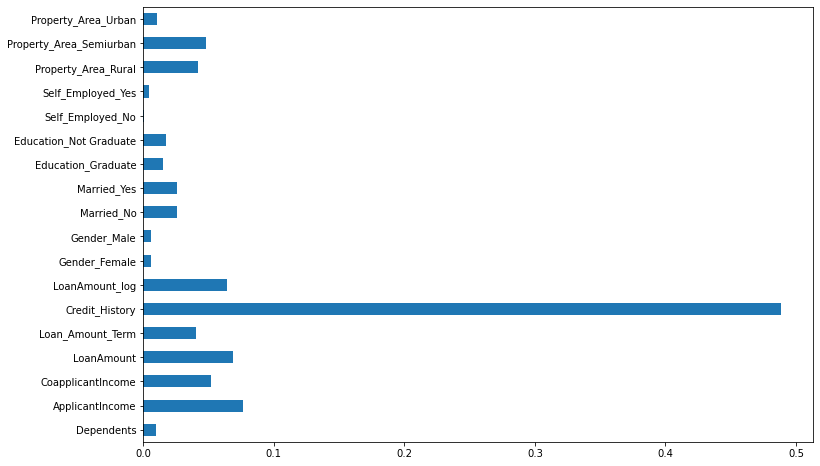

In [86]:
importances = pd.Series(model.feature_importances_, index=X.columns)

# plot the horizontal bar chart
importances.plot(kind='barh', figsize=(12,8))

In [361]:
# import library
from xgboost import XGBClassifier

In [362]:
mean_accuracy = []
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model = XGBClassifier(random_state=1, n_estimators=50, max_depth=4)
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = precision_score(yvl,pred_test)
    mean_accuracy.append(score)
    print('accuracy_score %.2f'%(score*100)+'%')
    i+=1
    
print("\nMean validation accuracy: %.2f "%((sum(mean_accuracy)/len(mean_accuracy))*100)+"%")
pred_test = model.predict(x_test)
pred3=model.predict_proba(x_test)[:,1]



1 of kfold 5
accuracy_score 81.00%

2 of kfold 5
accuracy_score 82.65%

3 of kfold 5
accuracy_score 78.64%

4 of kfold 5
accuracy_score 76.29%

5 of kfold 5
accuracy_score 77.89%

Mean validation accuracy: 79.30 %


In [368]:
xgb_clf = GridSearchCV(model,{
    'max_depth': list(range(1, 20, 2)),
    'n_estimators': list(range(1, 200, 20))
},cv=5,scoring=scoring,refit="Precission",return_train_score=False)

xgb_clf.fit(X, y)
xgb_clf.cv_results_

{'mean_fit_time': array([0.0062027 , 0.00970764, 0.01090393, 0.01280975, 0.01971765,
        0.01503587, 0.02282238, 0.03090086, 0.03566022, 0.03376446,
        0.0065423 , 0.01405511, 0.01587043, 0.02395568, 0.02607217,
        0.02649331, 0.03423162, 0.03988495, 0.04698801, 0.05406008,
        0.00328512, 0.01436014, 0.02302575, 0.02825289, 0.03101006,
        0.03787479, 0.04809074, 0.04780035, 0.0604918 , 0.07085466,
        0.003332  , 0.01141987, 0.02512698, 0.03460917, 0.03419847,
        0.04406099, 0.05234637, 0.06074882, 0.07445879, 0.07809987,
        0.00333905, 0.01367598, 0.02660904, 0.03592129, 0.04110627,
        0.04858847, 0.0520659 , 0.07098694, 0.07478428, 0.09514518,
        0.00795155, 0.0251895 , 0.03339567, 0.03406286, 0.04706297,
        0.06394072, 0.06294146, 0.06966138, 0.07496142, 0.08395963,
        0.00696373, 0.01906638, 0.0270772 , 0.03329358, 0.04375467,
        0.05234509, 0.05602531, 0.05999451, 0.07249093, 0.07568488,
        0.00479436, 0.0171423 ,

In [369]:
xgb_df = pd.DataFrame(xgb_clf.cv_results_)
xgb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,...,std_test_AUC,rank_test_AUC,split0_test_Precission,split1_test_Precission,split2_test_Precission,split3_test_Precission,split4_test_Precission,mean_test_Precission,std_test_Precission,rank_test_Precission
0,0.006203,0.001487,0.005559,0.002863,1,1,"{'max_depth': 1, 'n_estimators': 1}",0.704644,0.659288,0.667582,...,0.041730,99,0.792453,0.768519,0.766355,0.830000,0.798077,0.791081,0.023177,81
1,0.009708,0.007950,0.003815,0.006056,1,21,"{'max_depth': 1, 'n_estimators': 21}",0.795666,0.678638,0.729396,...,0.053703,88,0.792453,0.766355,0.766355,0.830000,0.798077,0.790648,0.023611,83
2,0.010904,0.006474,0.003196,0.006392,1,41,"{'max_depth': 1, 'n_estimators': 41}",0.802632,0.683437,0.708486,...,0.044568,90,0.792453,0.766355,0.766355,0.830000,0.794118,0.789856,0.023414,87
3,0.012810,0.006415,0.006288,0.007707,1,61,"{'max_depth': 1, 'n_estimators': 61}",0.809133,0.695201,0.705586,...,0.044601,86,0.790476,0.766355,0.766355,0.830000,0.794118,0.789461,0.023383,89
4,0.019718,0.004736,0.000000,0.000000,1,81,"{'max_depth': 1, 'n_estimators': 81}",0.804489,0.697988,0.709554,...,0.042041,74,0.790476,0.766355,0.766355,0.838384,0.794118,0.791138,0.026343,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.054053,0.010283,0.009776,0.005998,19,101,"{'max_depth': 19, 'n_estimators': 101}",0.772136,0.724458,0.761600,...,0.033784,51,0.806452,0.774510,0.781250,0.837209,0.800000,0.799884,0.022034,42
96,0.060930,0.004501,0.002563,0.005127,19,121,"{'max_depth': 19, 'n_estimators': 121}",0.770588,0.727864,0.761600,...,0.033160,41,0.808511,0.784314,0.781250,0.845238,0.802198,0.804302,0.022930,22
97,0.070117,0.004302,0.000108,0.000217,19,141,"{'max_depth': 19, 'n_estimators': 141}",0.771517,0.725387,0.764042,...,0.035232,44,0.808511,0.774510,0.781250,0.857143,0.811111,0.806505,0.029158,12
98,0.076144,0.007588,0.005167,0.006686,19,161,"{'max_depth': 19, 'n_estimators': 161}",0.771207,0.725077,0.767094,...,0.035707,46,0.806452,0.782178,0.781250,0.855422,0.802198,0.805500,0.026966,13


In [371]:
xgb_df[['param_n_estimators','param_max_depth','mean_test_Precission']]

,param_n_estimators,param_max_depth,mean_test_Precission
0,1,1,0.791081
1,21,1,0.790648
2,41,1,0.789856
3,61,1,0.789461
4,81,1,0.791138
...,...,...,...
95,101,19,0.799884
96,121,19,0.804302
97,141,19,0.806505
98,161,19,0.805500


In [374]:
display(f"Best perameter is{xgb_clf.best_params_}")
display(f"Best Precission is {round(xgb_clf.best_score_,4)*100}%")

"Best perameter is{'max_depth': 15, 'n_estimators': 141}"

'Best Precission is 81.33%'